                Advanced Data Structures:
        

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In 2016 I began following a series of notebooks by Jake Vanderplas (JV) for the Astr599 course at the University of Washington originaly available at:

    http://www.astro.washington.edu/users/vanderplas/Astr599/notebooks/02_advanced_data_structures

In 2018 I returned to JVs notebooks and found that this website was no longer active. At that time JV was with the UW eScience Institute as Director of Open Software and the notebooks were available, and still are in 2024, on github:

    https://github.com/jakevdp/2014_fall_ASTR599/tree/master/notebooks

JV is now a software engineer with Google Research in Seattle and a developer of a number of open-source software projects.

As part of learning a bit about Git I'm going to revise the three notebooks I created as a result of carrying out the exercises in this course.

Originally I used Spyder 2.2.5, Python 2.7.3, IPython 0.13.2.rc2, Ubuntu 12.04LTS as my work environment.

The version info was originally produced, in a nicely formatted way, by an ipython extension. The current version was installed using 'conda install version_information' as part of my miniforge3 install.

In [3]:
%load_ext version_information
%version_information Matplotlib numpy, scipy, matplotlib

Software versions
Python 3.12.3 64bit [GCC 12.3.0]
IPython 8.25.0
OS Linux 5.15.0 121 generic x86_64 with glibc2.35
Matplotlibnumpy The 'Matplotlibnumpy' distribution was not found and is required by the application
scipy 1.14.0
matplotlib 3.8.4
Mon Sep 16 13:09:14 2024 EDT

## Astr599:

The exercises in this section of the course allowed me to play around with lists and dictionaries. First I created a file Asteroids.py to store the given data and loaded it:

In [4]:
run 'Asteroids.py'

This file contains:

    1. A list, 'Asteroids' with info for 50 asteroids.
       Each tuple in the list consists of: 
       (asteroid name, semi-major axis(AU), eccentricity, orbit class).

    2. A dictionary, 'orbit_class'.    
    
    The data originally came from http://ssd.jpl.nasa.gov/sbdb_query.cgi which doesn't seem to be             available any longer. JV includes the data as part of     

        2014_fall_ASTR599/notebooks/02_advanced_data_structures.ipynb

    around line 71.

For example:

In [5]:
# Individual tuples can be accessed:
Asteroids[0]

('Eros', 1.457916888347732, 0.2226769029627053, 'AMO')

In [6]:
# Each item in the tuple can be accessed in a similar fashion:
Asteroids[0][1]

1.457916888347732

In [7]:
orbit_class

{'AMO': 'Amor', 'APO': 'Apollo', 'ATE': 'Aten'}

In [8]:
orbit_class['ATE']

'Aten'

The first exercise asked to select the asteroids within 0.2au of earth with an eccentricity < 0.5. After some trial and error I came up with the following list comprehension:

In [9]:
L = [(n,a,e,t) for (n,a,e,t) in Asteroids if (abs(a - 1.0) < .2) and (e < 0.5)]

In [10]:
L

[('Cerberus', 1.079965807367047, 0.4668134997419173, 'APO'),
 ('Aten', 0.9668828078092987, 0.1827831025175614, 'ATE'),
 ('Bacchus', 1.078135348117527, 0.3495569270441645, 'APO'),
 ('Ra-Shalom', 0.8320425524852308, 0.4364726062545577, 'ATE'),
 ('Hathor', 0.8442121506103012, 0.4498204013480316, 'ATE'),
 ('Khufu', 0.989473784873371, 0.468479627898914, 'ATE')]

Next I tried to sort the results using the list.sort() method which is extremely badly documented as far as I can tell.

In [11]:
L.sort()
L

[('Aten', 0.9668828078092987, 0.1827831025175614, 'ATE'),
 ('Bacchus', 1.078135348117527, 0.3495569270441645, 'APO'),
 ('Cerberus', 1.079965807367047, 0.4668134997419173, 'APO'),
 ('Hathor', 0.8442121506103012, 0.4498204013480316, 'ATE'),
 ('Khufu', 0.989473784873371, 0.468479627898914, 'ATE'),
 ('Ra-Shalom', 0.8320425524852308, 0.4364726062545577, 'ATE')]

This sorts on the first field which makes sense. To sort on another field is another thing altogether! The help info is confusing as there is no explanation or link to the idea of a 'key function':

    Definition : sort(...)
    
    Type : Function of None module
    
    Sort the list in ascending order and return None.
    
    The sort is in-place (i.e. the list itself is modified) and stable (i.e. the order of two equal           elements is maintained).
    
    If a key function is given, apply it once to each list item and sort them, ascending or                   descending, according to their function values.
    
    The reverse flag can be set to sort in descending order.
    
Searching the ipython docs was unhelpful but I did find a description of the 'key function' approach at:

    https://scipython.com/book/chapter-4-the-core-python-language-ii/examples/sorting-methods/
    
The following is a sort on the semi-major axis. The second element in each tuple in L is chosen by the lambda function and passed to the sort function:

In [12]:
L.sort(key=lambda a: a[1])
L

[('Ra-Shalom', 0.8320425524852308, 0.4364726062545577, 'ATE'),
 ('Hathor', 0.8442121506103012, 0.4498204013480316, 'ATE'),
 ('Aten', 0.9668828078092987, 0.1827831025175614, 'ATE'),
 ('Khufu', 0.989473784873371, 0.468479627898914, 'ATE'),
 ('Bacchus', 1.078135348117527, 0.3495569270441645, 'APO'),
 ('Cerberus', 1.079965807367047, 0.4668134997419173, 'APO')]

I then created a dictionary from the list results above:

In [13]:
D = dict([(name, (a, e, t)) for (name, a, e, t) in L])
D

{'Ra-Shalom': (0.8320425524852308, 0.4364726062545577, 'ATE'),
 'Hathor': (0.8442121506103012, 0.4498204013480316, 'ATE'),
 'Aten': (0.9668828078092987, 0.1827831025175614, 'ATE'),
 'Khufu': (0.989473784873371, 0.468479627898914, 'ATE'),
 'Bacchus': (1.078135348117527, 0.3495569270441645, 'APO'),
 'Cerberus': (1.079965807367047, 0.4668134997419173, 'APO')}

You can remove keys from the dictionary with:

In [14]:
D.pop('Bacchus')
D

{'Ra-Shalom': (0.8320425524852308, 0.4364726062545577, 'ATE'),
 'Hathor': (0.8442121506103012, 0.4498204013480316, 'ATE'),
 'Aten': (0.9668828078092987, 0.1827831025175614, 'ATE'),
 'Khufu': (0.989473784873371, 0.468479627898914, 'ATE'),
 'Cerberus': (1.079965807367047, 0.4668134997419173, 'APO')}

and add keys with:

In [15]:
D['Bacchus'] = (1.078135348117527, 0.3495569270441645, 'APO')
D

{'Ra-Shalom': (0.8320425524852308, 0.4364726062545577, 'ATE'),
 'Hathor': (0.8442121506103012, 0.4498204013480316, 'ATE'),
 'Aten': (0.9668828078092987, 0.1827831025175614, 'ATE'),
 'Khufu': (0.989473784873371, 0.468479627898914, 'ATE'),
 'Cerberus': (1.079965807367047, 0.4668134997419173, 'APO'),
 'Bacchus': (1.078135348117527, 0.3495569270441645, 'APO')}

The last step was to replace the orbital class designation using the info from the orbit_class dictionary above:

In [16]:
L2 = []
print ('L2 = ', "\n")
print ('Asteroid', "\t", 'a (AU)', "\t", 'e', "\t", "\t",'Class')
print ('-------------------------------------------------------')
for n,a,e,t in L:
    if t == 'APO': 
        nn = n,a,e,orbit_class['APO']
        L2.append(nn)
    elif t == 'AMO':
        nn = n,a,e,orbit_class['AMO']
        L2.append(nn)
    elif t == 'ATE':
        nn = n,a,e,orbit_class['ATE']
        L2.append(nn)
    else:
        pass
for n,a,e,t in L2:
    print ('{0:12s} \t {1:1.4f} \t {2:1.4f} \t {3}'.format(n,a,e,t))

L2 =  

Asteroid 	 a (AU) 	 e 	 	 Class
-------------------------------------------------------
Ra-Shalom    	 0.8320 	 0.4365 	 Aten
Hathor       	 0.8442 	 0.4498 	 Aten
Aten         	 0.9669 	 0.1828 	 Aten
Khufu        	 0.9895 	 0.4685 	 Aten
Bacchus      	 1.0781 	 0.3496 	 Apollo
Cerberus     	 1.0800 	 0.4668 	 Apollo


### Ipython Intro:

The next notebook (03_IPython_intro.ipynb) deals largely with some basic ipython operations. 

I was mostly interested in how to acquire existing notebooks and play with them which was left to the user as an exercise:

>    1. Using notebooks made available by others on the Internet

>       Find a Notebook shared from the ***IPython Notebook Gallery(https://github.com/ipython/ipython/wiki/
>       A-gallery-of-interesting-IPython-Notebooks)*** and Download it via http://nbviewer.ipython.org. 
>       Then import it into your running Notebook server using the Dashboard.

The link provided for the gallery has been redirected a couple of times, ultimately to,

    https://github.com/jupyter/jupyter/wiki#a-gallery-of-interesting-jupyter-notebooks

as of 2023, from which you can choose a notebook to view and download. 

Clicking a notebook opens it in 

    https://nbviewer.org/github/...

as a webpage in your browser. You'll see a download icon at the top right of the notebook page.

Clicking on the download icon produces a webpage 

    https://raw.githubusercontent.com/...

of what appears to be a JSON representation but definitely not a nice notebook! 

Right-clicking on the page allows you to '*save as*' this file as a .ipynb file where convenient. 

The new notebook can be accessed from Jupyter and played with as if I had written it :-)

At this point I downloaded a few notebooks to look at and get ideas from, in particular I was interested in how to do simple Markdown and how some of the nicer formatting had been accomplished.


OK now continuing with Astr599 part 4:

## Functions and Modules

First of all JV clarifies some things about functions such as args(required) and Kwargs(optional).

First a reminder of a couple of lists from the original asteroids list:

In [17]:
L

[('Ra-Shalom', 0.8320425524852308, 0.4364726062545577, 'ATE'),
 ('Hathor', 0.8442121506103012, 0.4498204013480316, 'ATE'),
 ('Aten', 0.9668828078092987, 0.1827831025175614, 'ATE'),
 ('Khufu', 0.989473784873371, 0.468479627898914, 'ATE'),
 ('Bacchus', 1.078135348117527, 0.3495569270441645, 'APO'),
 ('Cerberus', 1.079965807367047, 0.4668134997419173, 'APO')]

In [18]:
L2

[('Ra-Shalom', 0.8320425524852308, 0.4364726062545577, 'Aten'),
 ('Hathor', 0.8442121506103012, 0.4498204013480316, 'Aten'),
 ('Aten', 0.9668828078092987, 0.1827831025175614, 'Aten'),
 ('Khufu', 0.989473784873371, 0.468479627898914, 'Aten'),
 ('Bacchus', 1.078135348117527, 0.3495569270441645, 'Apollo'),
 ('Cerberus', 1.079965807367047, 0.4668134997419173, 'Apollo')]

Now a simple function to illustrate the args (L) and kwargs (f=):

In [19]:
def Sumf(L, f=1):
    """ summation of a field in the asteroid data 
    
    parameters
    ---------
    L : list of tuples
        the list of asteroids and their sma, ecc and orbital class
    f : integer
        the field to be summed (in this case the semi-major axes)
        
    returns
    ------
    s : float
        the sum of the values in the field = f
    """
    s = 0.0
    for k in L:
        s += k[f]
    return s

In [20]:
Sum = Sumf(L2)   ### uses the default Kw, i.e semi-major axis ###
print ('The sum of the semi-major axes = ', Sum)

Sum = Sumf(L2, f=2)   ### uses the optional Kw to choose the eccentricity ###
print ('The sum of the eccentricities = ', Sum)

The sum of the semi-major axes =  5.790712451262776
The sum of the eccentricities =  2.353926164805147


### Next some interesting stuff wrt to documentation and html. 

First a reminder re the ipython help command. Typing

Sumf?

returns:

Next he shows how to create HTML documentation from a file automatically using pydoc(a command-line program bundled with Python).

First, write the Sumf function to a file:

In [21]:
%%file fieldsum.py

def Sumf(L, f=1):
    """ summation of a field in the asteroid data 
    
    parameters
    ---------
    L : list of tuples
        the list of asteroids and their sma, ecc and orbital class
    f : integer
        the field to be summed (in this case the semi-major axes)
        
    returns
    ------
    s : float
        the sum of the values in the field = f
    """
    s = 0.0
    for k in L:
        s += k[f]
    return s

Overwriting fieldsum.py


In [22]:
cat fieldsum.py


def Sumf(L, f=1):
    """ summation of a field in the asteroid data 
    
    parameters
    ---------
    L : list of tuples
        the list of asteroids and their sma, ecc and orbital class
    f : integer
        the field to be summed (in this case the semi-major axes)
        
    returns
    ------
    s : float
        the sum of the values in the field = f
    """
    s = 0.0
    for k in L:
        s += k[f]
    return s


In [23]:
!pydoc -w fieldsum

wrote fieldsum.html


In [24]:
from IPython.display import HTML
HTML(open('fieldsum.html').read())

When opened directly in a browser (firefox) the display is better:

 
fieldsum 	index
/home/rj/Projects/Astr599/fieldsum.py

 
Functions
      	  	

Sumf(L, f=1)
    summation of a field in the asteroid data 
     
    parameters
    ---------
    L : list of tuples
        the list of asteroids and their sma, ecc and orbital class
    f : integer
        the field to be summed (in this case the semi-major axes)
        
    returns
    ------
    s : float
        the sum of the values in the field = f

In [25]:
# Pydoc can be used to display this info as well:
!pydoc fieldsum

Help on module fieldsum:

NAME
    fieldsum

FUNCTIONS
    Sumf(L, f=1)
        summation of a field in the asteroid data

        parameters
        ---------
        L : list of tuples
            the list of asteroids and their sma, ecc and orbital class
        f : integer
            the field to be summed (in this case the semi-major axes)

        returns
        ------
        s : float
            the sum of the values in the field = f

FILE
    /home/rj/Projects/Astr599/fieldsum.py




Once a python file has been created it can be treated as a Module and imported:

In [26]:
import fieldsum

fieldsum.Sumf(L2)

5.790712451262776

In [27]:
from fieldsum import Sumf as sf
sf(L2, f = 2)

2.353926164805147

In [28]:
# Is the info about the module fieldsum the same as pydoc?
fieldsum?

Type:        module
String form: <module 'fieldsum' from '/home/rj/Projects/Astr599/fieldsum.py'>
File:        ~/Projects/Astr599/fieldsum.py
Docstring:   <no docstring>

In [29]:
# fieldsum has no docstring:
print (fieldsum.__doc__)

None


### Next he mentions a few built-in modules:

*   sys: exposes interactions with the system(environment, File I/O, etc.)
*   os: exposes platform-specific operations(file stats, directories, paths, etc.)
*   math: exposes basic mathematical fuctions and constants


In [30]:
# e.g.
import math

In [31]:
"""
A reminder that typing 'math.' and pressing tab
gives a list of all the functions in the math module.
For examaple, the perm function which calculates the 
permutations of n objects taken k at a time, with order: 
"""

math.perm(4,2)  # 4 choose 2

12

In [32]:
math.perm(5)  # defaults to 5!

120

## Making a script executable

In JV's words:

>When a script or module is run directly from the command-line (i.e. not imported) a special variable called __name__ is set to "__main__".

>So, in your module, if you want some part of the code to only run when the script is executed directly, then you can make it look like this:

> all module stuff: <br>
> > [...]

> at the bottom, put this: <br>
> > if __ __name__ __ == '__ __main__ __': <br>
>     # do some things <br>
>     print "I was called from the command-line!"

Here is a file I wrote to illustrate this:

In [46]:
%%file astfunctest.py

"""
Created on Tue Dec 10 21:01:29 2013

@author: rj

Created, by the author, as an example of a program using functions and
modules which can be imported in order to use its functions or 
run from the command line.

The asteroid data comes from 
http://ssd.jpl.nasa.gov/sbdb_query.cgi

"""

from Asteroids import Asteroids as As

import numpy as np
import matplotlib.pyplot as plt


def extractsm(astr):
   """ 
   Extract the semi-major axes from the list of tuples
   and return as a list(sm).
   """
   sm = []
   for (n,a,e,t) in astr:
      sm.append(a)
   return sm
    
def extractecc(astr):
   """ 
   Extract the eccentricities from the list of tuples
   and return as a list(ecc).
   """
   ecc = []
   for (n,a,e,t) in astr:
      ecc.append(e)
   return ecc
    
if __name__ == "__main__":
   """
   This part runs only if astfunctest.py is run 
   from the command line.
   """
   print ('Running astfunctest.py from the command line')
    
   astr = As
   sm = extractsm(astr)
   ecc = extractecc(astr)
   
   fig, axes = plt.subplots()
   axes.plot(sm,ecc, 'r')
   axes.set_xlabel('Semi-Major Axis(AU)')
   axes.set_ylabel('Eccentricity')
   axes.set_title('SMA vs Ecc for 50 Asteroids')

Overwriting astfunctest.py


In [47]:
L

[('Ra-Shalom', 0.8320425524852308, 0.4364726062545577, 'ATE'),
 ('Hathor', 0.8442121506103012, 0.4498204013480316, 'ATE'),
 ('Aten', 0.9668828078092987, 0.1827831025175614, 'ATE'),
 ('Khufu', 0.989473784873371, 0.468479627898914, 'ATE'),
 ('Bacchus', 1.078135348117527, 0.3495569270441645, 'APO'),
 ('Cerberus', 1.079965807367047, 0.4668134997419173, 'APO')]

In [48]:
import astfunctest as ast

In [49]:
ast.extractsm(L)

[0.8320425524852308,
 0.8442121506103012,
 0.9668828078092987,
 0.989473784873371,
 1.078135348117527,
 1.079965807367047]

Running astfunctest.py from the command line


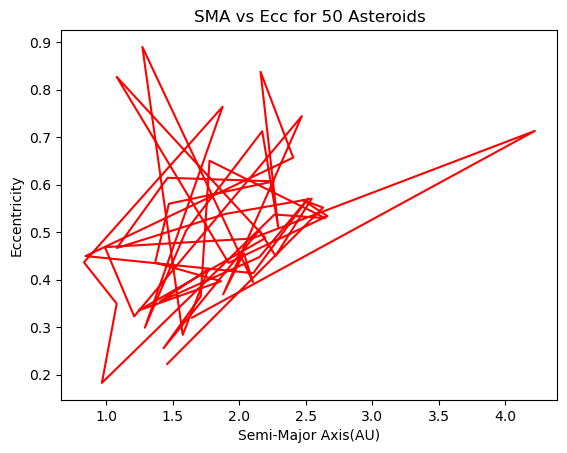

<Figure size 640x480 with 0 Axes>

In [50]:
run astfunctest.py

# **

## Introduction to Numerical Computing With Python:

I'll only note here some things which I hadn't used or wasn't that familar with:

In [118]:
lst = [1,2,3,4,5,6]
print ("lst = ", lst)
a = np.empty(5)
print ( "a = ", a)
a.fill(np.pi)
print ("a filled with pi = ", a)

lst =  [1, 2, 3, 4, 5, 6]
a =  [ 3.14159265  3.14159265  3.14159265  3.14159265  3.14159265]
a filled with pi =  [ 3.14159265  3.14159265  3.14159265  3.14159265  3.14159265]


range vs arange:

In [119]:
r = range(5)
print ("r = ", r)
print ("r is of: ", type(r) )
ra = np.arange(5)
print ( "ra = ", ra )
print ( "ra is of:", type(ra) )

r =  range(0, 5)
r is of:  <class 'range'>
ra =  [0 1 2 3 4]
ra is of: <class 'numpy.ndarray'>


Random numbers from a standard normal distribution(0 mean, variance = 1) vs random.normal with control over mean and variance:

In [120]:
rr = np.random.randn(5)
print ( rr )
rn = np.random.normal(10,3,5)
print ( rn )

[ 0.37389841  0.76836734  1.39497872 -2.00557449 -0.09887179]
[  6.66851205  11.30968925  11.03023414  10.88026876   6.3723413 ]


Using masks:

In [121]:
mask = rn <= 10
mask

array([ True, False, False, False,  True], dtype=bool)

In [122]:
print ( rn[mask] )

[ 6.66851205  6.3723413 ]


### Multidimensional Arrays:

Arrays and indexing:

The indexing is simpler for arrays than for lists:

In [123]:
print ( lst )
print ( lst[-1] )

[1, 2, 3, 4, 5, 6]
6


In [124]:
lst2 = [[1,2,3],[4,5,6]]
print ( type(lst2) )
print ( lst2 )

ar1 = np.arange(1,7).reshape(2,3)
print ( type(ar1) )
print ( ar1 )

<class 'list'>
[[1, 2, 3], [4, 5, 6]]
<class 'numpy.ndarray'>
[[1 2 3]
 [4 5 6]]


In [127]:
print ( lst2[0], lst2[0][1] )
print ()
# print ( lst2[0,1] )

[1, 2, 3] 2



Note: The last print statement gives an error:

    TypeError: list indices must be integers or slices, not tuple


In [128]:
print ( ar1[0], ar1[0][1], ar1[0,1] )

[1 2 3] 2 2


In [129]:
print ( ar1 )

print ( ar1[0,2] )
print ( ar1[:,2] )
print ( ar1[1,:] )

[[1 2 3]
 [4 5 6]]
3
[3 6]
[4 5 6]


### Properties:

Use ar1. [Tab] to get a list of properties:

In [130]:
print ( ar1.shape )
print ( ar1 )
ar1.cumsum(axis=1)   # i.e. sum along the rows 

(2, 3)
[[1 2 3]
 [4 5 6]]


array([[ 1,  3,  6],
       [ 4,  9, 15]], dtype=int32)

In [131]:
cs = ar1.cumsum(axis=0)   # i.e. sum along the columns
print ( cs.shape )
print ( cs )

(2, 3)
[[1 2 3]
 [5 7 9]]


Compare this with ar1.sum():

In [132]:
s = ar1.sum()
sr = ar1.sum(axis=1)  # sum along the rows, columns are used up, lose 1 dimension
sc = ar1.sum(axis=0)
print ( s, s.shape )
print ( sr, sr.shape )
print ( sc, sc.shape )

21 ()
[ 6 15] (2,)
[5 7 9] (3,)


### Note: There is no distinction between row and column vectors.

Broadcasting:

Essentially the system restructures arrays, using the following rules, so that their shapes match before carrying out an operation:

   1. If the two arrays differ in their number of dimensions, the shape of the array with fewer dimensions is padded with ones on its leading (left) side.

   2. If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

   3. If in any dimension the sizes disagree and neither is equal to 1, an error is raised.
   
Using one of JVs examples:

In [133]:
np.arange(3) + 5

array([5, 6, 7])

'Reshaping' via the 'newaxis' keyword:

b = arange(1,3)
print ( b                  # equivalent to a row vector
print ( b.shape
print ( b[newaxis, :]      # change to a column vector
print ( b.shape

JV then points out that numpy as well as scipy has many functions which work on entire arrays. For example, in scipy.special there are many functions:

In [134]:
import scipy.special as spec

In [135]:
spec

<module 'scipy.special' from '/home/rj/anaconda3/lib/python3.5/site-packages/scipy/special/__init__.py'>

### Reading and Writing Arrrays to Disk:

First save as text:

In [136]:
rr2 = np.random.normal(2,1,20).reshape(4,5)

In [137]:
print ( rr2 )
np.savetxt("rr2data", rr2, fmt='%.3f')
!ls r*

[[ 3.46242023  4.522795    3.88737247  3.96223055  0.71714256]
 [ 1.79809992  2.81777501  1.32191131  3.25210612  2.98258098]
 [ 2.10896466  1.77780227  1.57603001  1.51063275  1.54759785]
 [ 2.35747571  1.87080618  3.18928942  1.80092484  2.47303118]]
rr2data  rr2dataasbin.npy


In [138]:
rr2b = np.loadtxt("rr2data")
print ( rr2b )                # there will be obvious differences from rr2
print ( "any differences?", np.any(rr2 - rr2b) )

[[ 3.462  4.523  3.887  3.962  0.717]
 [ 1.798  2.818  1.322  3.252  2.983]
 [ 2.109  1.778  1.576  1.511  1.548]
 [ 2.357  1.871  3.189  1.801  2.473]]
any differences? True


In [139]:
print ( rr2 ) 
np.save("rr2dataasbin.npy", rr2)
rr2c = np.load("rr2dataasbin.npy")
print ( "any differences?", np.any(rr2 - rr2c) )

[[ 3.46242023  4.522795    3.88737247  3.96223055  0.71714256]
 [ 1.79809992  2.81777501  1.32191131  3.25210612  2.98258098]
 [ 2.10896466  1.77780227  1.57603001  1.51063275  1.54759785]
 [ 2.35747571  1.87080618  3.18928942  1.80092484  2.47303118]]
any differences? False


Note: With the binary save the data was preserved.

## Exercises: Trapezoidal Integration

Part 1: Write a function trapz(x, y), that applies the trapezoid formula to pre-computed values, where x and y are 1-d arrays. (Use numpy operations, not loops!)

In [140]:
!cat trapz.py

# -*- coding: utf-8 -*-
"""
Created on Tue Dec 24 22:38:22 2013

@author: rj
"""

import numpy as np

# Create a function which will take precalculated xs and
# ys and apply the trapezoidal rule to them.

def trapz(x,y):
    # calc the x(i)-x(i-1)
    xdif = x[1:] - x[:-1]
    # print "xdif = ", xdif
    # # calc the y(i)+y(i-1)
    ysum = y[1:] + y[:-1]
    # print "ysum = ", ysum
    xyprod = xdif*ysum
    # print "xyprod = ", xyprod
    # return the result of the trapezoidal rule
    return xyprod.sum()/2.

if __name__ == "__main__":
    
    # create x range (a,b), number of steps(n)
    a = 0.
    b = 5.
    n = 50
    xs = np.linspace(a,b,n)
    # print "xs = ",xs

    # create the y values for a given function: y = 2x
    ys = lambda k: 2*k
    ys = ys(xs)
    # print "ys = ",ys
    
    TR = trapz(xs,ys)
    print "TR = ", TR
    
    
    
    



In [141]:
run trapz

SyntaxError: Missing parentheses in call to 'print' (trapz.py, line 40)

The function trapz(x,y) has correctly calculated the area under the line y = 2x on the interval (0,5).

Part 2: Write a function trapzf(f, a, b, npts=100) that accepts a function f, the endpoints a and b and the number of samples to take npts. Sample the function uniformly at these points and return the value of the integral.

In [142]:
!cat trapzf.py

# -*- coding: utf-8 -*-
"""
Created on Wed Dec 25 11:29:14 2013

@author: rj

trapzf(f, a, b, npts=100) is a function that accepts
a function f, the endpoints a and b and
the number of samples to take npts.

"""

import numpy as np


def trapzf(f,a,b,npts=100):
    # create the x values based on the npts    
    xs = np.linspace(a,b,npts)
    # print "xs = ",xs
    # create the y values for the given funnction f
    ys = eval(f)
    # print "ys = ",ys    
    # calc the x(i)-x(i-1)
    xdif = xs[1:] - xs[:-1]
    # print "xdif = ", xdif
    # # calc the y(i)+y(i-1)
    ysum = ys[1:] + ys[:-1]
    # print "ysum = ", ysum
    xyprod = xdif*ysum
    # print "xyprod = ", xyprod
    # return the result of the trapezoidal rule
    return xyprod.sum()/2.

if __name__ == "__main__":
    
    # create x range (a,b), number of steps(n)
    a = 0.
    b = 5.
    npts = 5
    
    # 'f' is the function to be integrated
    f = 'xs**2'

    # test trapzf for npts = 5
    TR = trapzf(f,a,b,npts)
   

In [151]:
run trapzf

TR =  42.96875
TR =  41.6687923001


Note the use of the eval() function to enable simple passage of the function to be evaluated to the defined function. 

For example, the result is correct for this integral as shown below:

In [152]:
from IPython.display import Math
Math(r'\int^5_0 x^2 = \frac{x^3}{3} {\Big]^5_0} = 41.\dot{6}')

<IPython.core.display.Math object>

Part 4: Investigate scipy.integrate and find a function to do this integration. This module contains a few functions which use the trapezoidal rule such as trapz()

In [153]:
import scipy.integrate as Int
x = np.linspace(0,5,50)
ys = lambda x: x**2
y = ys(x)

Int.trapz(y,x)

41.675343606830488

As well as others such as quad() which accomplish the same thing:

In [154]:
y = lambda x:x**2
Int.quad(y,0,5)

(41.666666666666664, 4.625929269271485e-13)

In his answers he uses slicing which has some interesting properties:

In [155]:
x = np.linspace(0,10,15)
print ( x )
print ( 'xs shape = ', x.shape )
print ( 'the fifth element = ', x[5] ) # numbering starts at 0
print ( "the first 5 elements = ",x[:5] )
print ( "every 5th element = ",x[::5] )


[  0.           0.71428571   1.42857143   2.14285714   2.85714286
   3.57142857   4.28571429   5.           5.71428571   6.42857143
   7.14285714   7.85714286   8.57142857   9.28571429  10.        ]
xs shape =  (15,)
the fifth element =  3.57142857143
the first 5 elements =  [ 0.          0.71428571  1.42857143  2.14285714  2.85714286]
every 5th element =  [ 0.          3.57142857  7.14285714]


In [156]:
from IPython.display import FileLink, FileLinks

In [157]:
FileLink('Astr599 - 2.ipynb')

/home/rj/Notebooks/Astr599 - 2.ipynb